# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

# Notebook Presentation

In [15]:
# Show numeric output in decimal format e.g., 2.15
pd.set_option('display.float_format', '{:,.2f}'.format)

# Read the Dataset

In [16]:
df_apps = pd.read_csv(r'Data_files/apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [17]:
df_apps.info()
df_apps.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_MBs        10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Android_Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1016.5+ KB


App               9660
Category            33
Rating              39
Reviews           6001
Size_MBs           471
Installs            20
Type                 2
Price               92
Content_Rating       6
Genres             119
Last_Updated      1377
Android_Ver         33
dtype: int64

In [18]:
df_apps['Content_Rating'].value_counts()

Content_Rating
Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [19]:
df_apps.sample(n=5, axis=0)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
396,Jaylex,MEDICAL,NaN,0,13.00,10,Free,0,Everyone,Medical,"July 30, 2018",4.2 and up
9520,DINO HUNTER: DEADLY SHORES,GAME,4.40,1381624,54.00,"10,000,000",Free,0,Teen,Action,"March 14, 2017",3.0 and up
8503,Muzy - Share photos & collages,PHOTOGRAPHY,4.40,70189,13.00,"5,000,000",Free,0,Teen,Photography,"August 11, 2015",4.0 and up
7486,ARY NEWS,NEWS_AND_MAGAZINES,4.40,2959,9.80,"1,000,000",Free,0,Everyone,News & Magazines,"August 4, 2018",4.1 and up
8115,Hambo,GAME,4.40,125578,17.00,"5,000,000",Free,0,Everyone,Action,"July 6, 2015",2.1 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [20]:
# 1st way
df_apps.drop(columns=['Last_Updated', 'Android_Ver'], inplace=True)

# 2nd way
# df_apps.pop('Last_Updated')
# df_apps.pop('Android_Ver')

df_apps.sample(3)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
367,CL 2ne1 Wallpaper KPOP UHD Fans,PERSONALIZATION,NaN,1,3.40,10,Free,0,Everyone,Personalization
9675,Police Car Driver,GAME,3.80,83671,30.00,"10,000,000",Free,0,Everyone 10+,Racing
748,Interactive NPC DM Tool,FAMILY,2.80,5,0.61,50,Paid,$0.99,Everyone,Role Playing


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [21]:
df_apps['Rating'].isna().sum()

1474

In [22]:
apps_clean_df = df_apps.dropna(axis=0, subset='Rating')

print(1474 + apps_clean_df.shape[0])
# Should be 10 841

apps_clean_df.shape[0]

10841


9367

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [23]:
print(f'Total number of duplicates: {apps_clean_df.duplicated(subset=['App', 'Type', 'Price']).sum()}\n')

apps_clean_df.duplicated(subset=['App', 'Type', 'Price'])

Total number of duplicates: 1168



21       False
28       False
47       False
82       False
99       False
         ...  
10836     True
10837     True
10838     True
10839     True
10840     True
Length: 9367, dtype: bool

In [24]:
apps_clean_df[apps_clean_df['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [25]:
apps_clean_df[apps_clean_df['App'] == 'Facebook']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10811,Facebook,SOCIAL,4.10,78128208,5.30,"1,000,000,000",Free,0,Teen,Social


In [26]:
print(f'Number of duplicates for Instagram: {apps_clean_df[apps_clean_df['App'] == 'Instagram'].duplicated(
    subset=['App', 'Type', 'Price']
).sum()}\n')

apps_clean_df[apps_clean_df['App'] == 'Instagram'].duplicated(subset=['App', 'Type', 'Price'])

Number of duplicates for Instagram: 3



10806    False
10808     True
10809     True
10810     True
dtype: bool

In [27]:
print(f'Initial shape: {df_apps.shape}')
print(f'Shape after droping rows with na values: {apps_clean_df.shape}')

apps_clean_df.drop_duplicates(subset=['App', 'Type', 'Price'], inplace=True)

print(f'Shape after droping duplicates: {apps_clean_df.shape}')

Initial shape: (10841, 10)
Shape after droping rows with na values: (9367, 10)
Shape after droping duplicates: (8199, 10)


C:\Users\szymo\AppData\Local\Temp\ipykernel_11348\169551118.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
apps_clean_df[apps_clean_df['App'].isin(['Instagram', 'Facebook'])]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [29]:
# Remaining duplicates?

apps_clean_df['App'].nunique()
apps_clean_df.duplicated(subset='App', keep=False).sum()
apps_clean_df[apps_clean_df.duplicated(subset='App', keep=False)]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1195,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
2637,Calculator,DATING,2.60,57,6.20,"1,000",Paid,$6.99,Everyone,Dating
5510,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.20,4559,6.40,"100,000",Free,0,Everyone,Medical
10479,Calculator,TOOLS,4.30,40770,3.40,"100,000,000",Free,0,Everyone,Tools


In [30]:
apps_clean_df.sort_values(by='Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


In [31]:
# Different ratings

apps_clean_df['Rating'].value_counts().index.to_numpy()

array([4.3, 4.4, 4.5, 4.2, 4.6, 4.1, 4. , 4.7, 3.9, 3.8, 5. , 3.7, 4.8,
       3.6, 3.5, 3.4, 3.3, 4.9, 3. , 3.1, 3.2, 2.9, 2.8, 2.6, 2.7, 2.3,
       2.5, 2.4, 1. , 2.2, 1.9, 2. , 1.8, 2.1, 1.7, 1.6, 1.5, 1.4, 1.2])

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [32]:
apps_clean_df.sort_values(by='Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


In [33]:
f'Number of apps which take up 100 MBs: {(apps_clean_df['Size_MBs'] == 100).sum()}'

'Number of apps which take up 100 MBs: 14'

# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [34]:
most_reviews_df = apps_clean_df.sort_values(by='Reviews', ascending=False)[:50]
most_reviews_df.head().style.format(thousands=',', precision=2)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,"78,158,306",5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,"69,119,316",3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,"66,577,313",5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,"56,642,847",3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,"44,891,723",98.00,"100,000,000",Free,0,Everyone 10+,Strategy


In [35]:
most_reviews_df['Type'].value_counts()

Type
Free    50
Name: count, dtype: int64

In [36]:
(most_reviews_df['Type'] != 'Free').sum()

0

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [37]:
apps_by_content = apps_clean_df['Content_Rating'].value_counts(normalize=True)
apps_by_content

Content_Rating
Everyone          0.81
Teen              0.11
Mature 17+        0.04
Everyone 10+      0.04
Adults only 18+   0.00
Unrated           0.00
Name: proportion, dtype: float64

In [38]:
apps_by_content[~apps_by_content.index.isin(['Adults only 18+', 'Unrated'])]

Content_Rating
Everyone       0.81
Teen           0.11
Mature 17+     0.04
Everyone 10+   0.04
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Share of different app content categories')

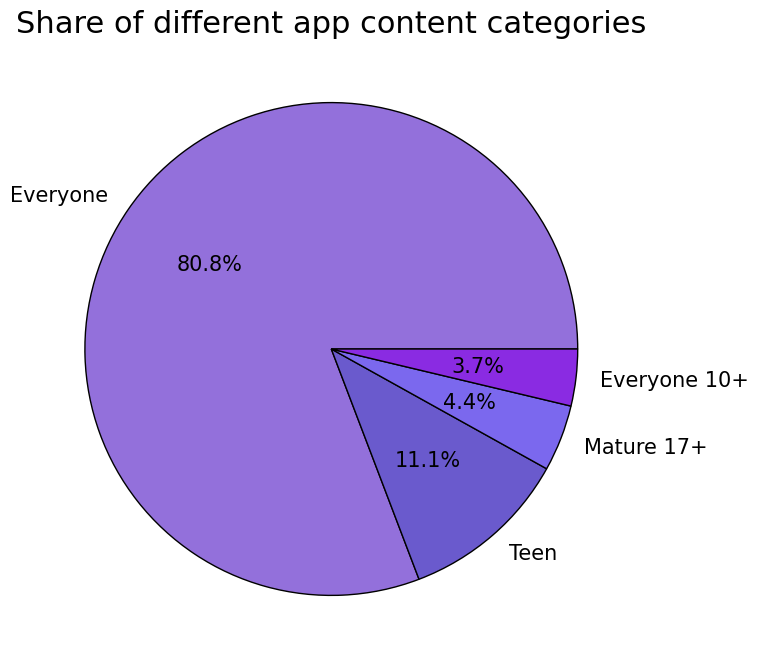

In [39]:
plt.figure(figsize=(8, 8))

plt.pie(
    apps_by_content[~apps_by_content.index.isin(['Adults only 18+', 'Unrated'])],
    labels=apps_by_content.index[~apps_by_content.index.isin(['Adults only 18+', 'Unrated'])],
    autopct='%1.1f%%',
    textprops={'fontsize': 15},
    wedgeprops={'edgecolor': 'black'},
    colors=['#9370DB', '#6A5ACD', '#7B68EE', '#8A2BE2'],
)

plt.title('Share of different app content categories', fontsize=22)

In [40]:
fig = px.pie(
  values=apps_by_content[~apps_by_content.index.isin(['Adults only 18+', 'Unrated'])],
  names=apps_by_content.index[~apps_by_content.index.isin(['Adults only 18+', 'Unrated'])],
  title='Share of different app content categories',
  width=None,
  height=600,
  hole=0.6
)

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [41]:
apps_clean_df['Installs'].dtypes

dtype('O')

In [42]:
apps_clean_df['Installs'].value_counts()

apps_clean_df['Installs'] = apps_clean_df['Installs'].str.replace(',', '')
apps_clean_df['Installs'] = pd.to_numeric(apps_clean_df['Installs'])
apps_clean_df

C:\Users\szymo\AppData\Local\Temp\ipykernel_11348\3642003266.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\szymo\AppData\Local\Temp\ipykernel_11348\3642003266.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,1000000000,Free,0,Everyone,Productivity
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,1000000000,Free,0,Teen,Video Players & Editors
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,1000000000,Free,0,Teen,Video Players & Editors
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,1000000000,Free,0,Teen,News & Magazines


In [43]:
apps_installs = apps_clean_df['Installs'].value_counts().to_frame().sort_values(by='Installs', ascending=False)
apps_installs.index = apps_installs.index.map('{:,}'.format)
apps_installs

,count
Installs,
"1,000,000,000",20
"500,000,000",24
"100,000,000",189
"50,000,000",202
"10,000,000",933
"5,000,000",607
"1,000,000",1417
"500,000",504
"100,000",1096


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [44]:
apps_clean_df.head(3)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade


In [45]:
apps_clean_df['Price'] = apps_clean_df['Price'].str.replace('$', '').astype(float)
apps_clean_df.sort_values(by='Price', ascending=False).head(3)


C:\Users\szymo\AppData\Local\Temp\ipykernel_11348\3881391274.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance


### The most expensive apps sub $250

In [46]:
apps_clean_df.drop(
  index=apps_clean_df.loc[apps_clean_df['Price'] > 250].index,
  inplace=True
)

C:\Users\szymo\AppData\Local\Temp\ipykernel_11348\1303258781.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Highest Grossing Paid Apps (ballpark estimate)

In [47]:
apps_clean_df['Revenue_Estimate'] = apps_clean_df['Price'] * apps_clean_df['Installs']
apps_clean_df.sort_values(by='Revenue_Estimate', ascending=False).head(5)

C:\Users\szymo\AppData\Local\Temp\ipykernel_11348\3872920709.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [48]:
top_10_categories = apps_clean_df['Category'].value_counts()[:10].reset_index()
top_10_categories

fig = px.bar(
  x='Category',
  y='count',
  data_frame=top_10_categories,
  title='Number of apps per category'
)

fig.show()

In [49]:
downloads_per_category = apps_clean_df.groupby('Category')['Installs'].sum().sort_values(ascending=True).reset_index()
downloads_per_category

h_bar_chart = px.bar(
  y='Category',
  x='Installs',
  data_frame=downloads_per_category,
  title='App downloads per category',
  orientation='h'
)

h_bar_chart.show()

#### Apps in game category look up

In [50]:
game_apps_df = apps_clean_df[apps_clean_df['Category'] == 'GAME']
print(type(game_apps_df[['Installs']]))
print(game_apps_df[['Installs']].agg(['min', 'mean', 'max', 'count']))
game_apps_df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(3)

<class 'pandas.core.frame.DataFrame'>
              Installs
min               1.00
mean     15,229,409.58
max   1,000,000,000.00
count           910.00


,App,Installs
10835,Subway Surfers,1000000000
10777,Temple Run 2,500000000
10763,Candy Crush Saga,500000000


#### Number of apps in game category with number of installs higher than average

In [51]:
(game_apps_df['Installs'] > game_apps_df['Installs'].mean()).sum()

115

#### Average number of installs across the whole data set

In [52]:
'{:,.0f}'.format(apps_clean_df['Installs'].mean())

'9,186,103'

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [53]:
installs_vs_count_df = apps_clean_df.groupby('Category').agg({'App': 'count', 'Installs': 'sum'})
installs_vs_count_df.rename(columns={'App': 'App_count'}, inplace=True)

print(installs_vs_count_df.shape)
installs_vs_count_df.sort_values(by='App_count', ascending=False).head(3)

(33, 2)


,App_count,Installs
Category,,
FAMILY,1606,4437554490
GAME,910,13858762717
TOOLS,719,8099724500


In [54]:
installs_vs_count_df.index[::1]

Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK',
       'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', name='Category')

In [55]:
scatter_plot = px.scatter(
    data_frame=installs_vs_count_df,
    x='App_count',
    y='Installs',
    size='App_count',
    color='Installs',
    log_y=True,
    title='Category concentration',
    hover_name=installs_vs_count_df.index
)


scatter_plot.update_xaxes(title={'font': {'size': 20},
                                'text': 'Number of Apps'})
scatter_plot.update_yaxes(title={'font': {'size': 20},
                                 'text': 'Downloads'})

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [56]:
print(f'Genres count: {apps_clean_df['Genres'].nunique()}')
apps_clean_df['Genres'].value_counts(ascending=True)

Genres count: 114


Genres
Lifestyle;Pretend Play      1
Adventure;Education         1
Comics;Creativity           1
Lifestyle;Education         1
Card;Brain Games            1
                         ... 
Personalization           298
Productivity              301
Education                 429
Entertainment             467
Tools                     718
Name: count, Length: 114, dtype: int64

#### Values in Genre column which contain 'Education' (not 'Educational')

In [57]:
apps_clean_df['Genres'].value_counts()[
apps_clean_df['Genres'].value_counts().index.str.contains('Education')
& ~apps_clean_df['Genres'].value_counts().index.str.contains('Educational')
]

Genres
Education                       429
Education;Education              36
Education;Pretend Play           17
Education;Creativity              6
Education;Action & Adventure      4
Education;Music & Video           3
Education;Brain Games             3
Casual;Education                  3
Simulation;Education              3
Parenting;Education               3
Books & Reference;Education       2
Strategy;Education                1
Adventure;Education               1
Tools;Education                   1
Lifestyle;Education               1
Entertainment;Education           1
Puzzle;Education                  1
Health & Fitness;Education        1
Name: count, dtype: int64

In [58]:
stack = apps_clean_df['Genres'].str.split(';', expand=True).stack()
print(f'Stack shape: {stack.shape}, initail dataframe shape: {apps_clean_df.shape}')
print(f'Stack index lenght: {len(stack.index)}')

print(f'Unique values: After stack - {stack.nunique()}, Before stack - {apps_clean_df['Genres'].nunique()}')

Stack shape: (8564,), initail dataframe shape: (8184, 11)
Stack index lenght: 8564
Unique values: After stack - 53, Before stack - 114


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [59]:
top_genres_bar_chart = px.bar(
    x=stack.value_counts()[:15].index,
    y=stack.value_counts()[:15],
    title='Top genres',
    color=stack.value_counts()[:15],
    color_continuous_scale='Agsunset',
    hover_name=stack.value_counts().index[:15]
)

top_genres_bar_chart.update_xaxes(title=
                                  {'text': 'Genre',
                                   'font': {'size': 20}}
)
top_genres_bar_chart.update_yaxes(title=
                                  {'text': 'Number of apps',
                                   'font': {'size': 20}}
)

top_genres_bar_chart.update_layout(coloraxis_showscale=False)

# Grouped Bar Charts: Free vs. Paid Apps per Category

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.